In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [2]:
data = pd.read_csv("Tetuan City power consumption.csv")

In [3]:
data.head()

,DateTime,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   Zone 1 Power Consumption  52416 non-null  float64
 5   Zone 2 Power Consumption  52416 non-null  float64
 6   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [5]:
data.describe()

,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360


In [6]:
data.isnull().sum()

DateTime                    0
Temperature                 0
Humidity                    0
Wind Speed                  0
Zone 1 Power Consumption    0
Zone 2 Power Consumption    0
Zone 3 Power Consumption    0
dtype: int64

### Visualization

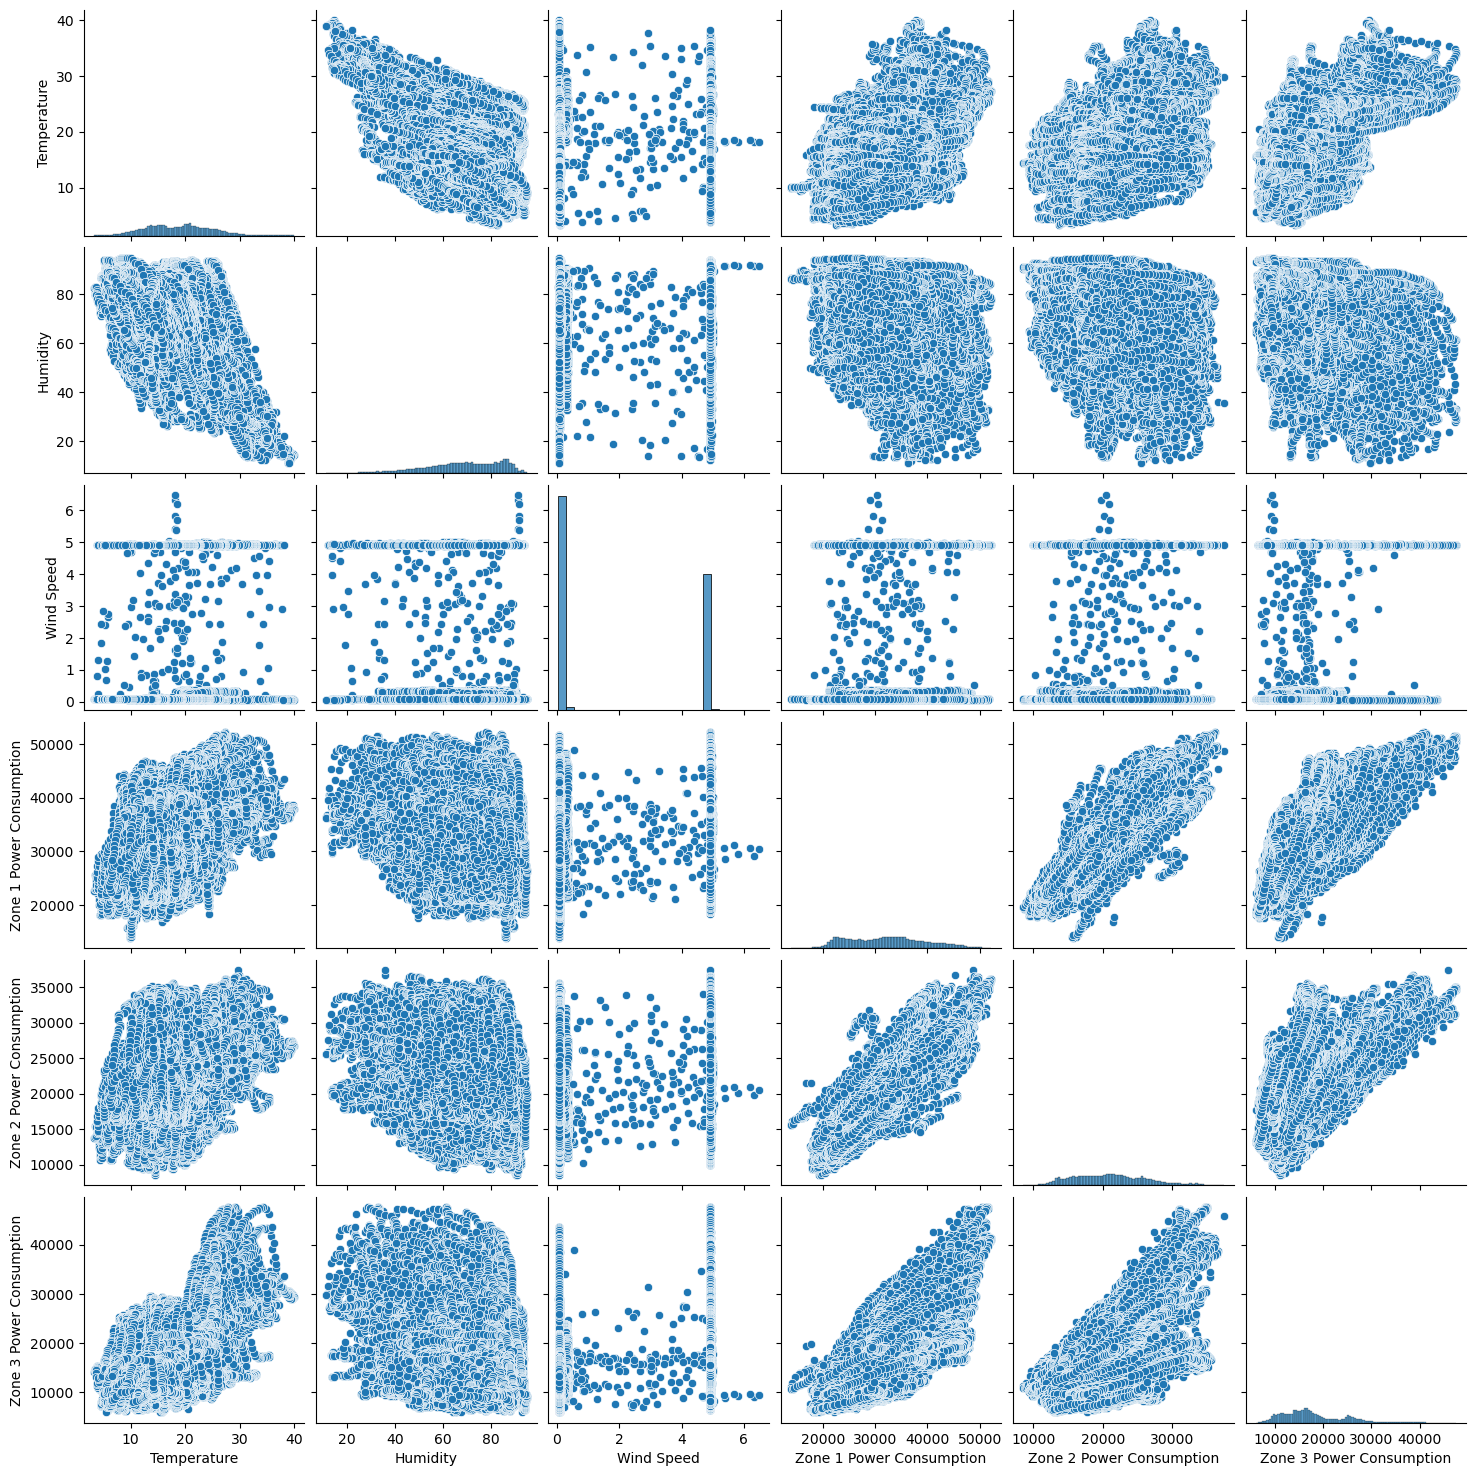

In [7]:
sns.pairplot(data)

In [8]:
#the correlation coefficients
data.corr().iloc[:7,0:7]

,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.287421,-0.294961,-0.233022
Wind Speed,0.477109,-0.135853,1.000000,0.167444,0.146413,0.278641
Zone 1 Power Consumption,0.440221,-0.287421,0.167444,1.000000,0.834519,0.750733
Zone 2 Power Consumption,0.382428,-0.294961,0.146413,0.834519,1.000000,0.570932
Zone 3 Power Consumption,0.489527,-0.233022,0.278641,0.750733,0.570932,1.000000


### Preprocessing Data for Zone 1

In [9]:
#Assigning the 3 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'
X = data.iloc[:,1:4].values
y1 = data["Zone 1 Power Consumption"].values

### Preprocessing Data for Zone 2

In [10]:
#Assigning the 3 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'
X = data.iloc[:,1:4].values
y2 = data["Zone 2 Power Consumption"].values

### Preprocessing Data for Zone 3

In [11]:
#Assigning the 3 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'
X = data.iloc[:,1:4].values
y3 = data["Zone 3 Power Consumption"].values

   ### Feature Scaling (Standardization)

In [12]:
#Feature scaling the three independent variables
#feature scaling limits the range of variables so that you can compare them on common grounds.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_scaled = sc_x.fit_transform(X)
X_scaled

array([[-2.10664461,  0.35627749, -0.7989004 ],
       [-2.13157832,  0.40129059, -0.7989004 ],
       [-2.14894594,  0.40129059, -0.80017763],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318],
       [-2.07242524,  0.30483395, -0.80017763],
       [-2.10303352,  0.37556882, -0.79975189]])

### Splitting the Dataset into Train and Test Sets for Zone 1

In [13]:
def split1(y):
    X_train,X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.20)
    return X_train,X_test, y_train, y_test

### Splitting the Dataset into Train and Test Sets for Zone 2

In [15]:
def split2():
     X_train,X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size = 0.20) 
return X_train,X_test, y_train, y_test

### Splitting the Dataset into Train and Test Sets for Zone 3

In [18]:
def split3():
    X_train,X_test, y_train, y_test = train_test_split(X_scaled, y3, test_size = 0.20)
    return (X_train3,X_test3, y_train3, y_test3)


In [19]:
print(split3)

<function split3 at 0x000001F799449EE0>


### Importing the Machine Learning Algorithm Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Model Training

In [ ]:
def train_model(x,y):
    split3
    lr = LinearRegression()
    model1 = lr.fit(X_train, y_train)

    rf = RandomForestRegressor()
    model2 = rf.fit(X_train, y_train)

### Feature Importance

### Making Predictions on the Test Data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred2

In [ ]:
user = pd.DataFrame({"Temperature": [12.5,21.8,17.9],
                     "Humidity":[71, 85.2, 54.0], 
                     "WindSpeed":[0.073, 0.068, 0.083]})
user

### Compare Performance Visually

In [ ]:
df = pd.DataFrame({"Actual (y_test)": y_test, "Lr model": y_pred1, 
                   "Rf model": y_pred2})
df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.subplot(221)
plt.plot(df["Actual (y_test)"].iloc[0:11],label = "Actual")
plt.plot(df["Lr model"].iloc[0:11], label = "Lr")
plt.legend()

plt.subplot(222)
plt.plot(df["Actual (y_test)"].iloc[0:11], label = "Actual")
plt.plot(df["Rf model"].iloc[0:11],  label = "Rf")
plt.legend()

plt.tight_layout()
plt.show()

### Evaluating the Algorithms

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
#Calculating the rmse of the fitted RF model
rmse_rf = np.sqrt(metrics.mean_squared_error(y_pred2,y_tes))
rmse_rf

### Calculating the R^2 of the models

In [ ]:
#The greater the value of the coefficient of determination( R^2), the better the regression model
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)

print(score1,score2)

#### The Rf model has the highest coefficient of determination

# Second Model

In [ ]:
#Using polynomial feature with the 3 independent variables with my Rf model
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_featuresX = poly.fit_transform(X)


fit_model=rf.fit(poly_featuresX,y)
y_prediction =fit_model.predict(poly_featuresX)


df = pd.DataFrame({"Predicted Power consumption (polynomial features Rf model)"
                   : y_prediction, "Actual": y})


### Evaluating the model

In [ ]:
rmse_pol = np.sqrt(metrics.mean_squared_error(df["Predicted Power consumption (polynomial features Rf model)"],df["Actual"]))
rmse_pol

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_prediction)
plt.plot([y_test.min(), y_test.max()], [y_prediction.min(), y_prediction.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

##  Data Model User Interface

In [ ]:
# save the model
import pickle
pickle.dump(rf, open("model.pkl", "wb"))

# load the model
model = pickle.load(open("model.pkl", "rb"))

# use model to predict
zonenum = int(input("Type in the zone you want the predicted power consumption value (type 1 for Zone 1, 2 for Zone 2, or 3 for Zone 3): "))
if zonenum == 1:
    usertemp = float(input('Type your temperature: '))
    userhumidity = float(input('Type your humidity: '))
    userws = float(input('Type your wind speed here: '))

    y_pred = model.predict([[usertemp,userhumidity,userws]])
    print("The predicted power consumption for Zone 1 is", y_pred)

# Database update interface

#### Add your observations

In [ ]:
obs_temp = float(input('Type your temperature observation: '))
obs_humidity = float(input('Type your humidity observation: '))
obs_ws = float(input('Type your wind speed observation: '))
obs_df = pd.DataFrame({"Temperature":obs_temp, "Humidity":obs_humidity, "Wind Speed":obs_ws},index=[0,1,2])

pd.df(data, obs_df,how='left', on='Temperature')


In [ ]:
obs_temp = float(input('Type your temperature observation: '))
obs_humidity = float(input('Type your humidity observation: '))
obs_ws = float(input('Type your wind speed observation: '))
obs_df = pd.DataFrame({"Temperature":obs_temp, "Humidity":obs_humidity, "Wind Speed":obs_ws},index=[0])

data=pd.concat([data,obs_df], ignore_index = True)
data

In [ ]:
# i remembered she said that we have to convert it back to a csv file
#the code is below
updated_data = data.to_csv("Tetuan City power consumption (updated).csv")